# <center>Semillero Quantum Computing</center>

## <center>Hands-On: Solución de ejercicios</center>


<center>Judol Alejandro Rodríguez Franco
<center>Universidad Nacional De Colombia
<center>Observatorio Astronómico Nacional
<center>Facultad De Ciencias

---
### <center>Abstract</center>

<center>Práctica de Qiskit realizada en lenguaje python con ayuda de notebooks de Jupyter; se solucionan ejercicios que ayudan matemática y visualmente a entender Qubits, representaciones y operaciones sobre ellos</center>

---

###Configuración del entorno

In [42]:
#Instalamos el paquete de Qiskit que contiene ejemplos y códigos contenidos en el libro
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-zwthcpjw
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-zwthcpjw
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 56445ab2fa8aacd50decdeed8dd3c5149369a2b9
  Preparing metadata (setup.py) ... done


In [43]:
#Usar matplotlib como graficador predeterminado
import matplotlib as mpl
circuit_drawer = mpl

In [44]:
#Instalamos el paquete que nos permite darle formato a las ecuaciones
%pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
#Sincronizar con la versión de Qiskit usada en los ejemplos del libro
import qiskit.tools.jupyter
%qiskit_version_table

In [46]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

###Ejercicio Clase 4


**Aplicar una compuerta de Haddamard a un qubit. ¿Qué significa el resultado?**


Si aplicamos una compuerta de Hadamard a un qubit en el estado $|q=\rangle\alpha|0\rangle + \beta|1\rangle$, obtendremos:

$$
\begin{aligned}
H(\alpha|0\rangle + \beta|1\rangle) &= \alpha H|0\rangle + \beta H|1\rangle \\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}\Bigg(\alpha 
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix} + \alpha 
\begin{pmatrix}
0 \\
1 \\
\end{pmatrix} \Bigg)\\
&= \alpha \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) + \beta \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \\
&= \frac{1}{\sqrt{2}}(\alpha + \beta)|0\rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)|1\rangle
\end{aligned}
$$

Por lo tanto, al aplicar la compuerta de Hadamard a este estado cuántico, obtenemos un nuevo estado cuántico que es una superposición de los estados $|0\rangle$ y $|1\rangle$, con amplitudes que dependen de los valores de $\alpha$ y $\beta$ siempre y cuando se cumpla la condición de normalización o de probabilidad igual a uno $\alpha^2 + \beta^2 =1$

Este resultado puede ser interpretado como la expansión del estado original en términos de la base de los estados $|0\rangle$ y $|1\rangle$, donde la magnitud cuadrada de las amplitudes de estos términos representa la probabilidad de medir el estado correspondiente después de la aplicación de la compuerta de Hadamard. Es decir, la probabilidad de medir el estado $|0\rangle$ después de aplicar la compuerta de Hadamard es $|\frac{1}{\sqrt{2}}(\alpha + \beta)|^2$, y la probabilidad de medir el estado $|1\rangle$ es $|\frac{1}{\sqrt{2}}(\alpha - \beta)|^2$.

Por ejemplo, 



####Ejemplo: Qubit $|0\rangle$

Si aplicamos una compuerta de Hadamard a un qubit en el estado $|0\rangle$, obtendremos:

$$
\begin{aligned}
H|0\rangle &=  \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix} \\
&=  \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix} \\
&= \frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
0 \\
\end{pmatrix}+\frac{1}{\sqrt{2}}\begin{pmatrix}
0 \\
1 \\
\end{pmatrix}\\
&= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\\
H|0\rangle &:= |+\rangle
\end{aligned}
$$

Por lo tanto, al aplicar la compuerta de Hadamard a este estado cuántico, obtenemos un nuevo estado cuántico que es una superposición de los estados $|0\rangle$ y $|1\rangle$, con amplitudes que, en este caso son las mismas y que en particular se define como el estado $|+\rangle$.

Las probabilidades entonces son

$$P(|0\rangle)=\Bigg(\frac{1}{\sqrt{2}}\Bigg)^2=\frac{1}{2}$$
$$P(|1\rangle)=\Bigg(\frac{1}{\sqrt{2}}\Bigg)^2=\frac{1}{2}$$

        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 
{'0': 513, '1': 511}


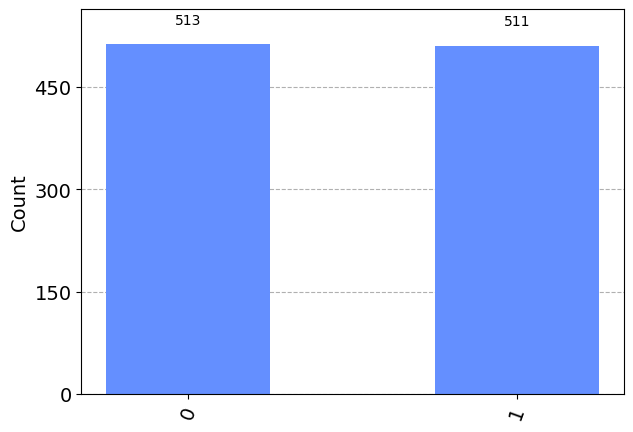

In [72]:
from qiskit import QuantumCircuit, Aer, execute

# Crear un circuito cuántico con un qubit
qc = QuantumCircuit(1)

# Aplicar la compuerta de Hadamard al qubit
qc.h(0)

# Medir el qubit
qc.measure_all()

# Ejecutar el circuito en un simulador cuántico
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()

counts=result.get_counts(qc)

# Imprimir el resultado
print(qc)
print(counts)
#print('\n Tras realizar 1024 mediciones sobre el bit cuántico, se obtiene casi la mitad de veces el estado cero y casi la mitad de veces el estado 1')
plot_histogram(counts)

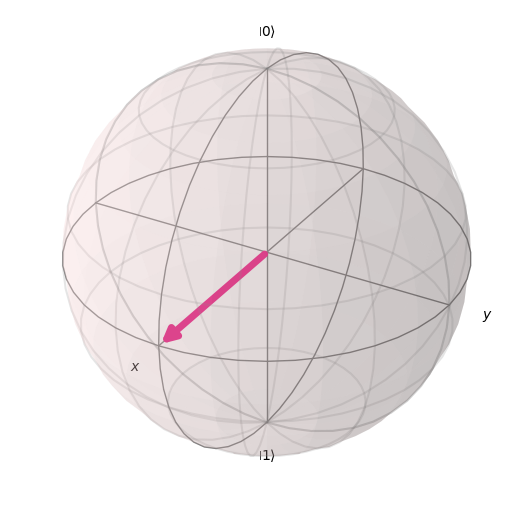

In [73]:
import numpy as np
from qiskit.visualization import plot_bloch_vector
coords = [1,0,np.pi/2]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')


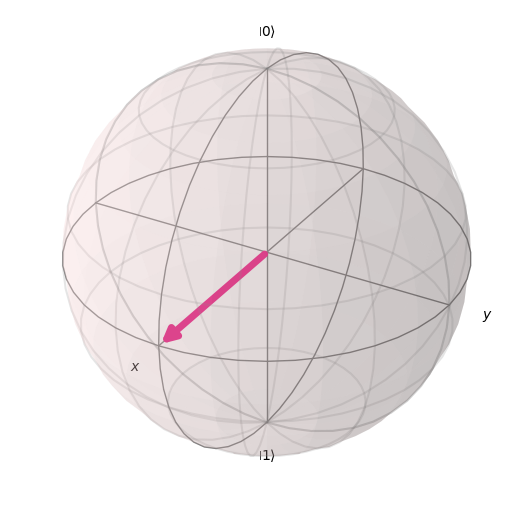

In [37]:
import numpy as np
from qiskit.visualization import plot_bloch_vector
coords2 = [1,np.pi/2,0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords2, coord_type='spherical')

####Otro ejemplo

Si el estado original es $\frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}}|1\rangle$, al aplicar la compuerta de Hadamard obtenemos:

$$
\begin{aligned}
H(\frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}}|1\rangle) &= \frac{1}{\sqrt{2}}(\frac{1}{\sqrt{3}} + \sqrt{\frac{2}{3}})|0\rangle + \frac{1}{\sqrt{2}}(\frac{1}{\sqrt{3}} - \sqrt{\frac{2}{3}})|1\rangle \\
&= \frac{1}{\sqrt{6}}(|0\rangle + 2|1\rangle)
\end{aligned}
$$

Por lo tanto, la probabilidad de medir el estado $|0\rangle$ después de aplicar la compuerta de Hadamard es $|\frac{1}{\sqrt{6}}|^2 = \frac{1}{6}$, y la probabilidad de medir el estado $|1\rangle$ es $|{\frac{2}{\sqrt{6}}}^2 = \frac{2}{3}$.



###Ejercicios clase 6

**Calcular los valores de $\theta$ y $\phi$ que permiten representar los siguientes Qubits y representarlos gráficamente:**

  1. $\ket{0}$
  2. $\ket{1}$
  3. $\frac{1}{\sqrt{2}}\Big(\ket{0} + \ket{1}\Big)$
  4. $\frac{1}{\sqrt{2}}\Big(\ket{0} - i \ket{1}\Big)$
  5. $\frac{1}{\sqrt{2}} i \ket{1}$

Recordemos las representaciones que tenemos:

1. Representación estándar: Usamos la notación de dirac en donde los dos coeficientes son complejos:

$$\ket{q} = \alpha \ket{0} + \beta \ket{1}$$

2. Representación esfera de Bloch: Se usa una transformación que permite un coeficiente real y otro complejo (que se representa como una rotación en un plano) permitiendo 'Dibujar' el Qubit como una esfera unitaria

$$\alpha=cos\Big(\frac{\theta}{2}\Big)$$
$$\beta = e^{i\phi}sin\Big(\frac{\theta}{2}\Big)$$

de manera que 

$$\ket{q} = cos\Big(\frac{\theta}{2}\Big) \ket{0} + e^{i\phi}sin\Big(\frac{\theta}{2}\Big) \ket{1}$$

####Punto 1:


$$\begin{aligned}
  \ket{0}&=1\cdot \ket{0} + 0\cdot \ket{1}\\
  \ket{0} &= cos\Big(\frac{\theta}{2}\Big) \ket{0} + e^{i\phi}sin\Big(\frac{\theta}{2}\Big) \ket{1}
  \end{aligned}$$


  esto significa que se deben cumplir dos igualdades:

  $$cos\Big(\frac{\theta}{2}\Big)=1$$
  $$e^{i\phi}sin\Big(\frac{\theta}{2}\Big)=0$$

  la solución es:

  $$\theta=0$$
  $$\phi=\text{cualquier ángulo}$$

 

In [52]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xcb\xd6\…

####Punto 2

  $$\begin{aligned}
  \ket{1}&=0\cdot \ket{0} + 1\cdot \ket{1}\\
  \ket{1} &= cos\Big(\frac{\theta}{2}\Big) \ket{0} + e^{i\phi}sin\Big(\frac{\theta}{2}\Big) \ket{1}
  \end{aligned}$$


  esto significa que se deben cumplir dos igualdades:

  $$cos\Big(\frac{\theta}{2}\Big)=0$$
  $$e^{i\phi}sin\Big(\frac{\theta}{2}\Big)=1$$

  la solución es:

  $$\theta=\pi$$
  $$\phi=0$$

In [54]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xcb\xd6\…

####Punto 3

$\frac{1}{\sqrt{2}}\Big(\ket{0} + \ket{1}\Big)$

  $$\begin{aligned}
  \frac{1}{\sqrt{2}}\Big(\ket{0} + \ket{1}\Big)&= \frac{1}{\sqrt{2}}\cdot \ket{0} + \frac{1}{\sqrt{2}}\cdot \ket{1}\\
  \frac{1}{\sqrt{2}}\Big(\ket{0} + \ket{1}\Big) &= cos\Big(\frac{\theta}{2}\Big) \ket{0} + e^{i\phi}sin\Big(\frac{\theta}{2}\Big) \ket{1}
  \end{aligned}$$


  esto significa que se deben cumplir dos igualdades:

  $$cos\Big(\frac{\theta}{2}\Big)=\frac{1}{\sqrt{2}}$$
  $$e^{i\phi}sin\Big(\frac{\theta}{2}\Big)=\frac{1}{\sqrt{2}}$$

  la solución es:

  $$\theta=\pi/2$$
  $$\phi=0$$

In [40]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xcb\xd6\…

####Punto 4

  4. 
  $\frac{1}{\sqrt{2}}\Big(\ket{0} - i \ket{1}\Big)$
  $$\begin{aligned}
  \frac{1}{\sqrt{2}}\Big(\ket{0} - i \ket{1}\Big)&= \frac{1}{\sqrt{2}}\cdot \ket{0} - \frac{i}{\sqrt{2}}\cdot \ket{1}\\
  \frac{1}{\sqrt{2}}\Big(\ket{0} + \ket{1}\Big) &= cos\Big(\frac{\theta}{2}\Big) \ket{0} + e^{i\phi}sin\Big(\frac{\theta}{2}\Big) \ket{1}
  \end{aligned}$$


  esto significa que se deben cumplir dos igualdades:

  $$cos\Big(\frac{\theta}{2}\Big)=\frac{1}{\sqrt{2}}$$
  $$e^{i\phi}sin\Big(\frac{\theta}{2}\Big)=-\frac{i}{\sqrt{2}}$$

  la solución es:

  $$\theta=\pi/2$$
  $$\phi=3\pi/2$$

In [41]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x01\xf4\x08\x06\x00\x00\x00\xcb\xd6\…